In [1]:
!pip install -U scikit-learn


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np # linear algebra
import re, os
import pandas as pd
import seaborn as sns
!pip install wordcloud
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize 
import warnings
warnings.filterwarnings("ignore")


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Get the file details 
directory = []
file = []
title = []
text = []
label = []
datapath = 'C:\\Users\\15143\\Desktop\\Cr_Bois_de_Boul_2022\\A_56\\A56Solution\\bbcsport11' 
for dirname, _ , filenames in os.walk(datapath):
    
    try:
        filenames.remove('README.TXT')
    except:
        pass
    for filename in filenames:
        directory.append(dirname)
        file.append(filename)
        label.append(dirname.split('\\')[-1])
        fullpathfile = os.path.join(dirname,filename)
        with open(fullpathfile, 'r', encoding="utf8", errors='ignore') as infile:
            intext = ''
            firstline = True
            for line in infile:
                if firstline:
                    title.append(line.replace('\n',''))
                    firstline = False
                else:
                    intext = intext + ' ' + line.replace('\n','')
            text.append(intext)

In [4]:
DATA_COLUMN = 'text'
LABEL_COLUMN = 'label'

fulldf = pd.DataFrame(list(zip(directory, file, title, text, label)), 
               columns =['directory', 'file', 'title', 'text', 'label'])

df = fulldf.filter(['text','label'], axis=1)
df.head()

,text,label
0,British hurdler Sarah Claxton is confident s...,athletics
1,Sonia O'Sullivan has indicated that she woul...,athletics
2,Maurice Greene aims to wipe out the pain of ...,athletics
3,The IAAF - athletics' world governing body -...,athletics
4,Ethiopia's Tirunesh Dibaba set a new world r...,athletics


In [5]:
fulldf.head()

,directory,file,title,text,label
0,C:\Users\15143\Desktop\Cr_Bois_de_Boul_2022\A_...,001.txt,Claxton hunting first major medal,British hurdler Sarah Claxton is confident s...,athletics
1,C:\Users\15143\Desktop\Cr_Bois_de_Boul_2022\A_...,002.txt,O'Sullivan could run in Worlds,Sonia O'Sullivan has indicated that she woul...,athletics
2,C:\Users\15143\Desktop\Cr_Bois_de_Boul_2022\A_...,003.txt,Greene sets sights on world title,Maurice Greene aims to wipe out the pain of ...,athletics
3,C:\Users\15143\Desktop\Cr_Bois_de_Boul_2022\A_...,004.txt,IAAF launches fight against drugs,The IAAF - athletics' world governing body -...,athletics
4,C:\Users\15143\Desktop\Cr_Bois_de_Boul_2022\A_...,005.txt,"Dibaba breaks 5,000m world record",Ethiopia's Tirunesh Dibaba set a new world r...,athletics


In [6]:
#EDA

In [7]:
df.shape

(737, 2)

In [8]:
df.dtypes

text     object
label    object
dtype: object

In [9]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [10]:
print(df['text'][:5])

0      British hurdler Sarah Claxton is confident s...
1      Sonia O'Sullivan has indicated that she woul...
2      Maurice Greene aims to wipe out the pain of ...
3      The IAAF - athletics' world governing body -...
4      Ethiopia's Tirunesh Dibaba set a new world r...
Name: text, dtype: object


In [11]:
print("\n__________\nRow 0 - text_a of training set : ", df.iloc[1].text)
print("\n__________\nRow 0 - label of training set : ", df.iloc[1].label)


__________
Row 0 - text_a of training set :    Sonia O'Sullivan has indicated that she would like to participate in next month's World Cross Country Championships in St Etienne.  Athletics Ireland have hinted that the 35-year-old Cobh runner may be included in the official line-up for the event in France on 19-20 March. Provincial teams were selected after last Saturday's Nationals in Santry and will be officially announced this week. O'Sullivan is at present preparing for the London marathon on 17 April. The participation of O'Sullivan, currentily training at her base in Australia, would boost the Ireland team who won the bronze three years agio. The first three at Santry last Saturday, Jolene Byrne, Maria McCambridge and Fionnualla Britton, are automatic selections and will most likely form part of the long-course team. O'Sullivan will also take part in the Bupa Great Ireland Run on 9 April in Dublin.

__________
Row 0 - label of training set :  athletics


In [12]:
for label in np.unique(df['label']):
    print(label)

athletics
cricket
football
rugby
tennis


In [13]:
df['label'].value_counts()

football     265
rugby        147
cricket      124
athletics    101
tennis       100
Name: label, dtype: int64

<AxesSubplot:>

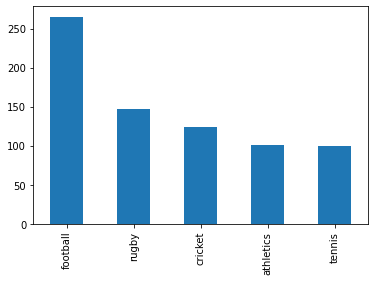

In [14]:
# Checking number of records of each label
df['label'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [15]:
df['News_length'] = df['text'].str.len()
print(df['News_length'])

0      1204
1       871
2      2011
3      1091
4       905
       ... 
732    1253
733     895
734     941
735    1447
736    1312
Name: News_length, Length: 737, dtype: int64


Text(0.5, 1.0, 'News length distribution')

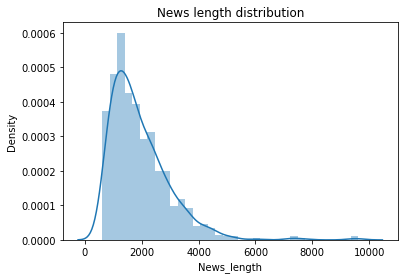

In [16]:
sns.distplot(df['News_length']).set_title('News length distribution')

In [17]:
#wordcloud
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

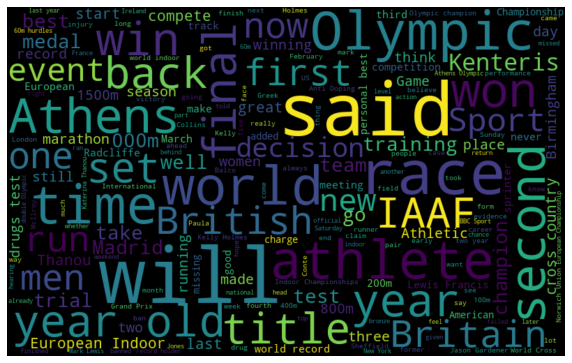

In [18]:
subset=df[df.label=="athletics"]
Text=subset.text.values
words =" ".join(Text)
create_wordcloud(words)

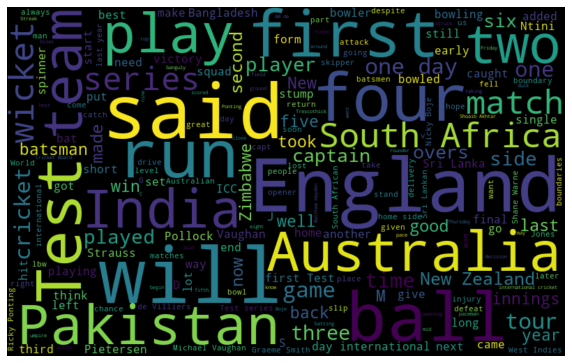

In [19]:
subset=df[df.label=="cricket"]
Text=subset.text.values
words =" ".join(Text)
create_wordcloud(words)

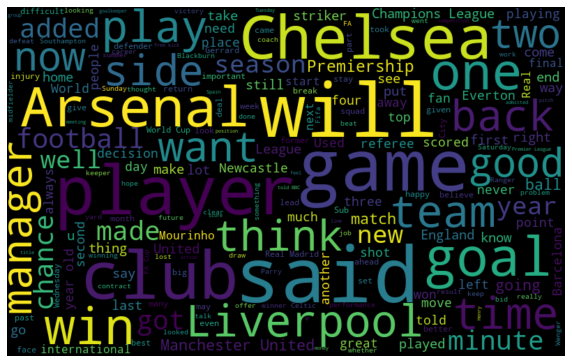

In [20]:
subset=df[df.label=="football"]
Text=subset.text.values
words =" ".join(Text)
create_wordcloud(words)

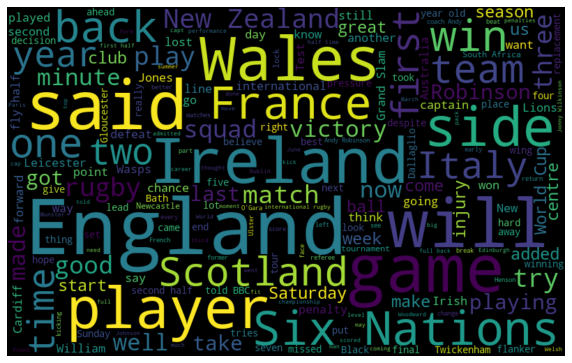

In [21]:
subset=df[df.label=="rugby"]
Text=subset.text.values
words =" ".join(Text)
create_wordcloud(words)

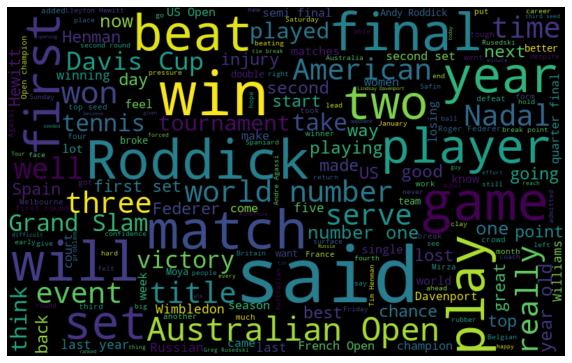

In [22]:
subset=df[df.label=="tennis"]
Text=subset.text.values
words =" ".join(Text)
create_wordcloud(words)

In [23]:
#Encode the labels into numeric

def set_code(row):
    if row["label"] == "athletics":
        return 1
    elif row["label"] == "cricket":
        return 2
    elif row["label"] == "football":
        return 3
    elif row["label"] == "rugby":
        return 4
    else:
        return 5

df = df.assign(target=df.apply(set_code, axis=1))

print(df.head())

                                                text      label  News_length  \
0    British hurdler Sarah Claxton is confident s...  athletics         1204   
1    Sonia O'Sullivan has indicated that she woul...  athletics          871   
2    Maurice Greene aims to wipe out the pain of ...  athletics         2011   
3    The IAAF - athletics' world governing body -...  athletics         1091   
4    Ethiopia's Tirunesh Dibaba set a new world r...  athletics          905   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


<AxesSubplot:>

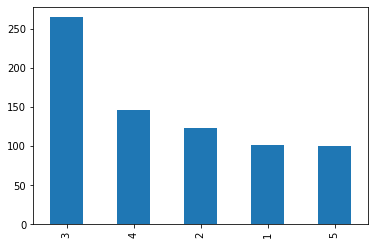

In [24]:
# Checking number of records of each target
df['target'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [25]:
df['target'].value_counts()

3    265
4    147
2    124
1    101
5    100
Name: target, dtype: int64

In [26]:
#Feature Engineering
#Removing Punctuations and Stopwords
#Removing the special characters

In [27]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

In [28]:
df['text'] = df['text'].apply(clean_text)
df['text'] = df['text'].str.replace('\d+', '')
df.head()

,text,label,News_length,target
0,british hurdler sarah claxton confident win fi...,athletics,1204,1
1,sonia osullivan indicated would like participa...,athletics,871,1
2,maurice greene aims wipe pain losing olympic m...,athletics,2011,1
3,iaaf athletics world governing body met antido...,athletics,1091,1
4,ethiopias tirunesh dibaba set new world record...,athletics,905,1


In [29]:
#Avant 

#__________
#Row 0 - text_a of training set :    Sonia O'Sullivan has indicated that she would like to participate in next 
#month's World Cross Country Championships in St Etienne.  Athletics Ireland have hinted that the 35-year-old 
#Cobh runner may be included in the official line-up for the event in France on 19-20 March. Provincial teams were 
#selected after last Saturday's Nationals in Santry and will be officially announced this week. O'Sullivan is at present 
#preparing for the London marathon on 17 April. The participation of O'Sullivan, currentily training at her base in Australia, 
#would boost the Ireland team who won the bronze three years agio. The first three at Santry last Saturday, Jolene Byrne, 
#Maria McCambridge and Fionnualla Britton, are automatic selections and will most likely form part of the long-course team. 
#O'Sullivan will also take part in the Bupa Great Ireland Run on 9 April in Dublin.

#__________
#Row 0 - label of training set :  athletics
    


In [30]:
#Apres
print("\n__________\nRow 0 - text_a of training set : ", df.iloc[1].text)
print("\n__________\nRow 0 - label of training set : ", df.iloc[1].label)


__________
Row 0 - text_a of training set :  sonia osullivan indicated would like participate next months world cross country championships st etienne athletics ireland hinted yearold cobh runner may included official lineup event france  march provincial teams selected last saturdays nationals santry officially announced week osullivan present preparing london marathon  april participation osullivan currentily training base australia would boost ireland team bronze three years agio first three santry last saturday jolene byrne maria mccambridge fionnualla britton automatic selections likely form part longcourse team osullivan also take part bupa great ireland run  april dublin

__________
Row 0 - label of training set :  athletics


In [31]:
#Data Balancing
#Split the data in Training and testing

In [32]:

X_train, X_test, y_train, y_test = train_test_split(df['text'], 
                                                    df['target'], 
                                                    test_size=0.2, 
                                                    random_state=8)

In [37]:
def upsample_classes(data, target):
    
    lst = list(data[target].unique())
    
    classes = []
    for c in lst:
        classes.append(data[data[target]==c])
    
    length = 0
    class_lab = None
    for c in classes:
        if len(c)>length:
            length=len(c)
            class_lab = c
    class_lab = class_lab[target].unique()[0]
    
    regroup = pd.concat(classes)
    maj_class = regroup[regroup[target]==class_lab]

    lst.remove(class_lab)
    
    new_classes=[]
    for i in lst:
        new_classes.append(resample(data[data[target]==i],replace=True, n_samples=len(maj_class)))

    minority_classes = pd.concat(new_classes)
    upsample = pd.concat([regroup[regroup[target]==class_lab],minority_classes])

    return upsample

In [65]:
from sklearn.utils import resample
train = pd.concat([X_train,y_train],axis=1)
train_balanced = (upsample_classes(train,'target'))
X_train_1 = train_balanced.text
y_train_1 = train_balanced.target

In [66]:
train_balanced .head()

,text,target
294,ajax refused reveal whether tottenhams boss ma...,3
472,fifa give financial support tanzania order rev...,3
428,new football association chief brian barwick p...,3
327,fa take action trouble marred wednesdays carli...,3
246,manchester citys paul bosvelt find within mont...,3


In [67]:
X_train_1.head()

294    ajax refused reveal whether tottenhams boss ma...
472    fifa give financial support tanzania order rev...
428    new football association chief brian barwick p...
327    fa take action trouble marred wednesdays carli...
246    manchester citys paul bosvelt find within mont...
Name: text, dtype: object

In [68]:
y_train_1.head()

294    3
472    3
428    3
327    3
246    3
Name: target, dtype: int64

In [69]:
y_train_1.value_counts()

3    217
2    217
1    217
4    217
5    217
Name: target, dtype: int64

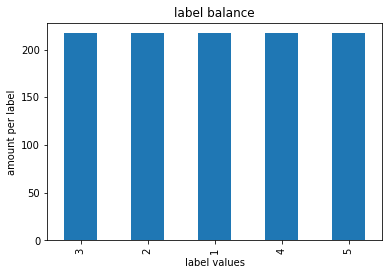

In [40]:
y_train_1.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

In [ ]:
#tf-idf

In [70]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [71]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train_1).toarray()
labels_train = y_train_1
print(features_train)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.13446023 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.13441258 0.        ]
 [0.         0.         0.         ... 0.11121757 0.         0.        ]
 [0.         0.         0.         ... 0.07551228 0.06988895 0.        ]]
(148, 300)


In [ ]:
#Building Models

In [72]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9864864864864865
              precision    recall  f1-score   support

           1       0.95      1.00      0.98        20
           2       1.00      1.00      1.00        26
           3       1.00      0.96      0.98        48
           4       1.00      1.00      1.00        34
           5       0.95      1.00      0.98        20

    accuracy                           0.99       148
   macro avg       0.98      0.99      0.99       148
weighted avg       0.99      0.99      0.99       148



In [73]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [78]:
#Hyper Paramater Tuning(Random Forest)
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 600, 1200, 1600]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [79]:
bestF.best_params_

{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1600}

In [80]:
from sklearn.ensemble import RandomForestClassifier
model1  = RandomForestClassifier(random_state=1,max_depth= 25, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 1600)
model1.fit(features_train, labels_train)
model_predictions = model1.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9864864864864865
              precision    recall  f1-score   support

           1       0.95      1.00      0.98        20
           2       1.00      1.00      1.00        26
           3       0.98      0.98      0.98        48
           4       1.00      0.97      0.99        34
           5       1.00      1.00      1.00        20

    accuracy                           0.99       148
   macro avg       0.99      0.99      0.99       148
weighted avg       0.99      0.99      0.99       148



In [81]:
#KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9391891891891891
              precision    recall  f1-score   support

           1       0.91      1.00      0.95        20
           2       1.00      0.96      0.98        26
           3       1.00      0.85      0.92        48
           4       0.87      1.00      0.93        34
           5       0.90      0.95      0.93        20

    accuracy                           0.94       148
   macro avg       0.94      0.95      0.94       148
weighted avg       0.95      0.94      0.94       148



In [82]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [83]:
#Hyper Paramaters Tuning (KNeighborsClassifier)
from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}


gridF = GridSearchCV(model, params_KNN, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


In [84]:
bestF.best_params_

{'n_neighbors': 1, 'p': 1}

In [85]:
model = KNeighborsClassifier(n_neighbors=1,p=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8581081081081081
              precision    recall  f1-score   support

           1       0.89      0.85      0.87        20
           2       1.00      0.88      0.94        26
           3       0.77      0.90      0.83        48
           4       0.87      0.79      0.83        34
           5       0.89      0.85      0.87        20

    accuracy                           0.86       148
   macro avg       0.89      0.85      0.87       148
weighted avg       0.87      0.86      0.86       148



In [86]:
#Decision Tree
model = DecisionTreeClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9054054054054054
              precision    recall  f1-score   support

           1       0.81      0.85      0.83        20
           2       0.96      0.88      0.92        26
           3       0.90      0.98      0.94        48
           4       0.97      0.91      0.94        34
           5       0.84      0.80      0.82        20

    accuracy                           0.91       148
   macro avg       0.90      0.89      0.89       148
weighted avg       0.91      0.91      0.91       148



In [87]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [88]:
#Hyper Paramter Tuning (Decision Tree)
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

min_samples_leaf = randint(1,9)

criterion = ['gini', 'entropy']
max_depth = [3,None]



hyperF = dict(max_depth=max_depth,
                      criterion=criterion,
                      min_samples_leaf=min_samples_leaf)

model  = DecisionTreeClassifier(random_state=1)
gridF = RandomizedSearchCV(model, hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [89]:
bestF.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1}

In [90]:
model = DecisionTreeClassifier(random_state=1,criterion= 'entropy', max_depth= None,min_samples_leaf=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9324324324324325
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        20
           2       1.00      0.92      0.96        26
           3       0.94      0.96      0.95        48
           4       0.89      0.97      0.93        34
           5       0.85      0.85      0.85        20

    accuracy                           0.93       148
   macro avg       0.94      0.92      0.93       148
weighted avg       0.94      0.93      0.93       148



In [ ]:
#Doc2Vec

In [92]:
train_balanced.head()

,text,target
294,ajax refused reveal whether tottenhams boss ma...,3
472,fifa give financial support tanzania order rev...,3
428,new football association chief brian barwick p...,3
327,fa take action trouble marred wednesdays carli...,3
246,manchester citys paul bosvelt find within mont...,3


In [93]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []

    
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    
    return labeled



X_train, X_test, y_train, y_test = train_test_split(train_balanced.text, train_balanced.target, random_state=8, test_size=0.2)

X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [94]:
all_data[0:2]

[TaggedDocument(words=['well', 'goodbye', 'another', 'olympic', 'year', 'usual', 'plenty', 'highs', 'lows', 'athens', 'obviously', 'theres', 'getting', 'away', 'differing', 'fortunes', 'kelly', 'holmes', 'paula', 'radcliffe', 'want', 'remind', 'events', 'made', 'another', 'year', 'remember', 'forget', 'athletics', 'one', 'favourite', 'olympic', 'moments', 'kellys', 'success', 'm', 'winning', 'race', 'key', 'success', 'm', 'would', 'bit', 'formality', 'kelly', 'full', 'shouldnt', 'thoughts', 'going', 'double', 'athens', 'thought', 'wouldnt', 'm', 'best', 'event', 'good', 'fun', 'commentate', 'm', 'nice', 'able', 'part', 'athens', 'story', 'victory', 'british', 'mens', 'xm', 'relay', 'team', 'bit', 'surprise', 'great', 'climax', 'games', 'think', 'four', 'jason', 'gardener', 'darren', 'campbell', 'marlon', 'devonish', 'mark', 'lewisfrancis', 'knew', 'deep', 'best', 'chance', 'medal', 'lads', 'run', 'poorly', 'individual', 'sprints', 'maybe', 'lift', 'game', 'knew', 'something', 'really',

In [95]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 1085/1085 [00:00<?, ?it/s]


In [96]:
import numpy as np
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [97]:
#Random Forest
model = RandomForestClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.9907834101382489
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        42
           2       1.00      0.97      0.99        39
           3       0.98      0.98      0.98        50
           4       0.98      1.00      0.99        44
           5       1.00      1.00      1.00        42

    accuracy                           0.99       217
   macro avg       0.99      0.99      0.99       217
weighted avg       0.99      0.99      0.99       217



In [98]:
#Hyper Parameter Tuning (Random Forest)
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 600, 1200, 1600]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(train_vectors_dbow, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [99]:
bestF.best_params_

{'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [100]:
model = RandomForestClassifier(max_depth=8,min_samples_leaf=1,min_samples_split=5,n_estimators=300)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.9907834101382489
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        42
           2       0.97      1.00      0.99        39
           3       1.00      0.96      0.98        50
           4       0.98      1.00      0.99        44
           5       1.00      1.00      1.00        42

    accuracy                           0.99       217
   macro avg       0.99      0.99      0.99       217
weighted avg       0.99      0.99      0.99       217



In [101]:
#KNeighborsClassifier
model = KNeighborsClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.7373271889400922
              precision    recall  f1-score   support

           1       0.62      0.95      0.75        42
           2       0.70      0.90      0.79        39
           3       1.00      0.10      0.18        50
           4       0.81      0.98      0.89        44
           5       0.82      0.88      0.85        42

    accuracy                           0.74       217
   macro avg       0.79      0.76      0.69       217
weighted avg       0.80      0.74      0.67       217



In [102]:
#Hyper Parameter Tuning (KNeighborsClassifier)
from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}


gridF = GridSearchCV(model, params_KNN, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(train_vectors_dbow, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


In [103]:
bestF.best_params_

{'n_neighbors': 1, 'p': 2}

In [104]:
model = KNeighborsClassifier(n_neighbors=1,p=2)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.8202764976958525
              precision    recall  f1-score   support

           1       0.73      0.98      0.84        42
           2       0.78      0.92      0.85        39
           3       1.00      0.34      0.51        50
           4       0.83      1.00      0.91        44
           5       0.89      0.95      0.92        42

    accuracy                           0.82       217
   macro avg       0.85      0.84      0.80       217
weighted avg       0.85      0.82      0.79       217



In [105]:
#Decision Tree
model = DecisionTreeClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.728110599078341
              precision    recall  f1-score   support

           1       0.76      0.83      0.80        42
           2       0.71      0.69      0.70        39
           3       0.77      0.54      0.64        50
           4       0.67      0.82      0.73        44
           5       0.75      0.79      0.77        42

    accuracy                           0.73       217
   macro avg       0.73      0.73      0.73       217
weighted avg       0.73      0.73      0.72       217



In [106]:
#Hyper Parameter Tuning (Decision Tree)
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

min_samples_leaf = randint(1,9)

criterion = ['gini', 'entropy']
max_depth = [3,None]



hyperF = dict(max_depth=max_depth,
                      criterion=criterion,
                      min_samples_leaf=min_samples_leaf)

model  = DecisionTreeClassifier(random_state=1)
gridF = RandomizedSearchCV(model, hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(train_vectors_dbow, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [107]:
bestF.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5}

In [108]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=None,min_samples_leaf=5)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.7004608294930875
              precision    recall  f1-score   support

           1       0.69      0.79      0.73        42
           2       0.74      0.67      0.70        39
           3       0.67      0.44      0.53        50
           4       0.60      0.86      0.71        44
           5       0.87      0.79      0.82        42

    accuracy                           0.70       217
   macro avg       0.71      0.71      0.70       217
weighted avg       0.71      0.70      0.69       217



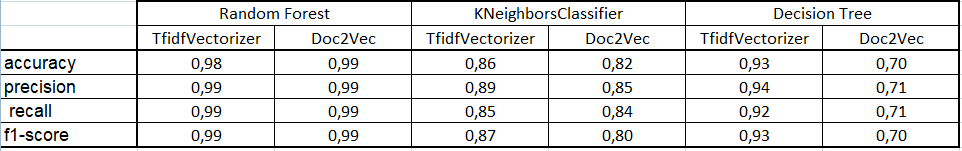
